# Data Analysis and Exploration of 100 CSRD reporting companies 
## ESRS E4 benchmark

### Import the data

In [9]:
# Import the relevant packages and the dataset
import os 
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get the file path from the environment variable
file_path = os.getenv("EXCEL_PATH")
print("Loaded path:", file_path)

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='Filtered')


Loaded path: None


ValueError: Invalid file path or buffer object type: <class 'NoneType'>

In [ ]:
# Print relevant columns for future reference
df.columns

Index(['Number', 'Company', 'Sector', 'E1 material', 'E2 material',
       'E3 material', 'E4 material', 'E5 material'],
      dtype='object')

### General reporting observations

In [ ]:
# Only select companies that have at least one material topic 
yes = df[
    (df["E1 material"] == "Yes") |
    (df["E2 material"] == "Yes") |
    (df["E3 material"] == "Yes") |
    (df["E4 material"] == "Yes") |
    (df["E5 material"] == "Yes")
]

print(f"A total of {yes.shape[0]} companies, representing {(yes.shape[0]/df.shape[0])*100:.2f}% of the dataset, have identified at least one E metric as material.")


A total of 100 companies, representing 99.01% of the dataset, have identified at least one E metric as material.


In [ ]:
material_columns = ["E1 material", "E2 material", "E3 material", "E4 material", "E5 material"]
yes_counts = yes[material_columns].apply(lambda col: (col == "Yes").sum())

# Convert the result to a DataFrame for tabular display
yes_counts_df = yes_counts.reset_index()
yes_counts_df.columns = ["Material", "Yes Count"]
yes_counts_df["Percentage"] = (yes_counts_df["Yes Count"] / yes.shape[0] * 100).round(2)
print(yes_counts_df)


      Material  Yes Count  Percentage
0  E1 material         99        99.0
1  E2 material         41        41.0
2  E3 material         38        38.0
3  E4 material         44        44.0
4  E5 material         72        72.0


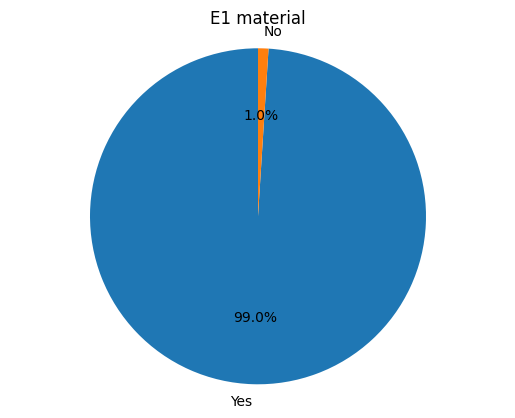

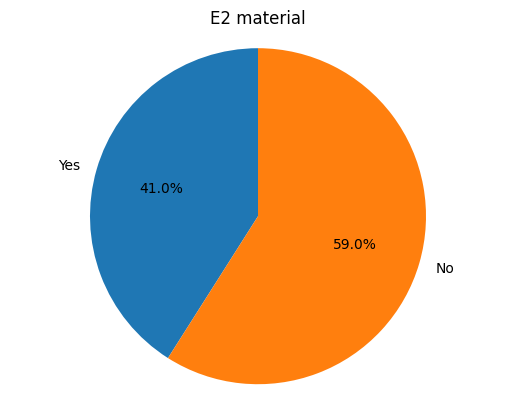

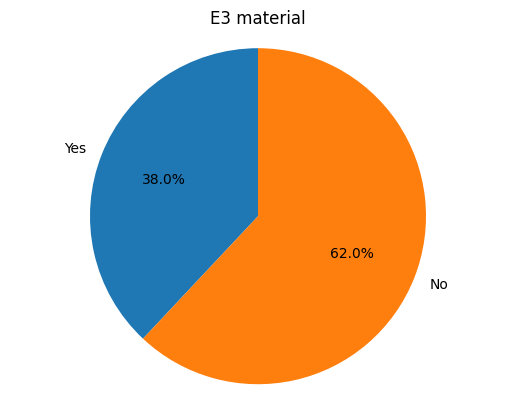

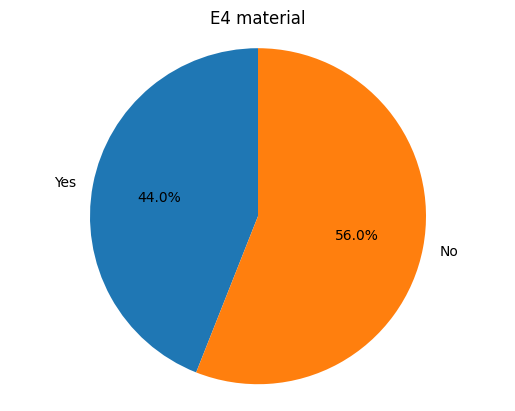

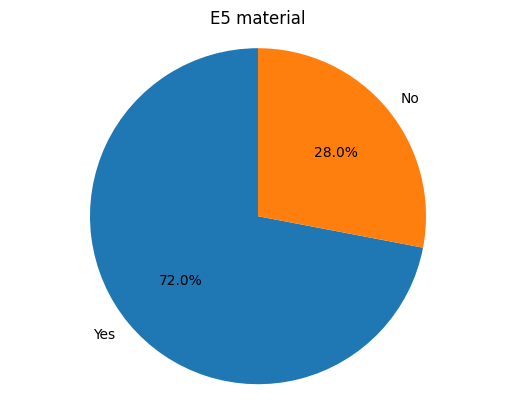

In [ ]:
# Plot pie charts for each material column
# fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, row in yes_counts_df.iterrows():
    labels = ['Yes', 'No']
    sizes = [row["Percentage"], 100 - row["Percentage"]]
    # axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    # axes[i].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    # axes[i].set_title(row["Material"])


    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(row["Material"])

    plt.show()

#fig.suptitle("Percentage of 'Yes' Responses per Metric across whole population", fontsize=16, y=1.05)
# plt.tight_layout()
# plt.show()



### Sector observations

In [ ]:
print(f"The sectors analysed include {yes['Sector'].unique()}")
sector_counts = yes['Sector'].value_counts()

# Convert the Series to a DataFrame with appropriate column names
sector_counts_df = sector_counts.reset_index()
sector_counts_df.columns = ['Sector', 'Count']
sector_counts_df


The sectors analysed include ['Technology & Communications' 'Transportation' 'Health Care'
 'Renewable Resources & Alternative Energy' 'Consumer Goods' 'Financials'
 'Renewable energy ' 'Resource Transformation' 'Food & Beverage'
 'Extractives & Mineral Processing' 'Infrastructure' 'Services']


,Sector,Count
0,Financials,14
1,Technology & Communications,13
2,Resource Transformation,12
3,Health Care,12
4,Food & Beverage,12
5,Transportation,9
6,Infrastructure,7
7,Extractives & Mineral Processing,7
8,Consumer Goods,5
9,Renewable Resources & Alternative Energy,4


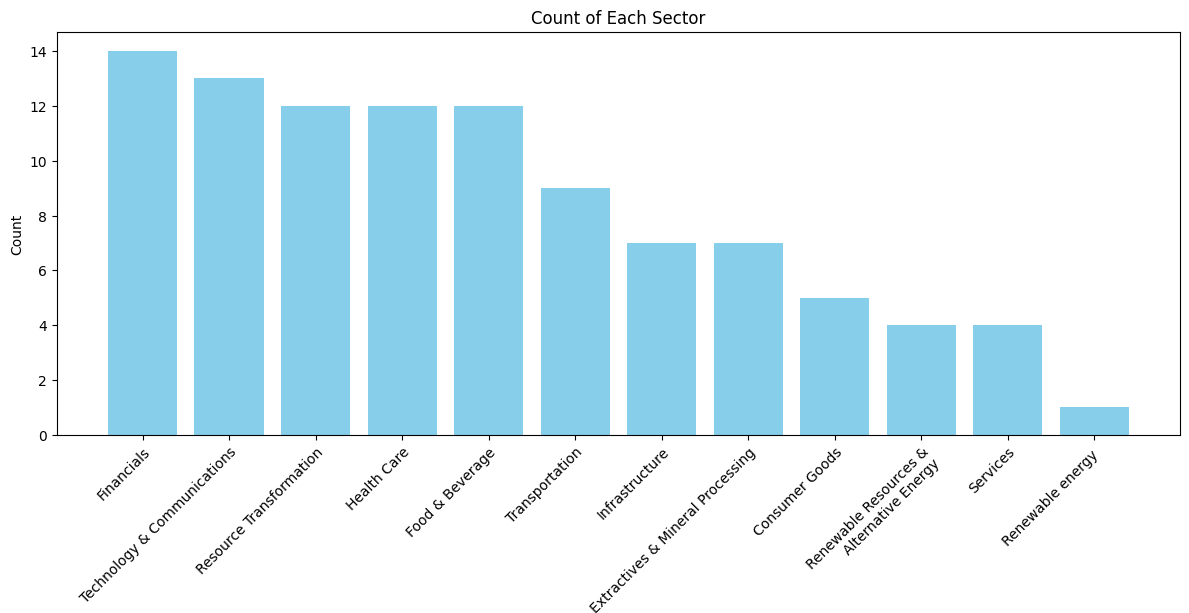

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sector_counts_df['Sector'], sector_counts_df['Count'], color='skyblue')
plt.title('Count of Each Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', wrap=True)
plt.tight_layout()
plt.show()



In [ ]:
#  Group by 'Sector' and count 'Yes' values for each metric column
yes_by_sector = yes.groupby("Sector")[material_columns].apply(lambda x: (x == "Yes").sum())


# Add a new column that counts how many times each sector appears
sector_counts = yes['Sector'].value_counts().rename_axis('Sector').reset_index(name='Sector Count')
yes_by_sector = yes_by_sector.reset_index().merge(sector_counts, on='Sector')

# Convert the Series to a DataFrame with appropriate column names
yes_counts_by_sector = yes_by_sector.reset_index()
yes_counts_by_sector

,index,Sector,E1 material,E2 material,E3 material,E4 material,E5 material,Sector Count
0,0,Consumer Goods,5,3,4,3,5,5
1,1,Extractives & Mineral Processing,7,6,4,6,6,7
2,2,Financials,14,0,0,3,4,14
3,3,Food & Beverage,12,4,8,7,11,12
4,4,Health Care,11,8,5,3,9,12
5,5,Infrastructure,7,3,2,7,7,7
6,6,Renewable Resources & Alternative Energy,4,2,4,3,4,4
7,7,Renewable energy,1,0,0,1,1,1
8,8,Resource Transformation,12,7,7,6,9,12
9,9,Services,4,0,1,0,1,4


In [ ]:
# Calculate the percentage of companies reporting E1 material as 'Yes' per sector
yes_counts_by_sector["E1 material %"] = (yes_counts_by_sector["E1 material"] / yes_counts_by_sector["Sector Count"] * 100).round(2)
yes_counts_by_sector["E2 material %"] = (yes_counts_by_sector["E2 material"] / yes_counts_by_sector["Sector Count"] * 100).round(2)
yes_counts_by_sector["E3 material %"] = (yes_counts_by_sector["E3 material"] / yes_counts_by_sector["Sector Count"] * 100).round(2)
yes_counts_by_sector["E4 material %"] = (yes_counts_by_sector["E4 material"] / yes_counts_by_sector["Sector Count"] * 100).round(2)
yes_counts_by_sector["E5 material %"] = (yes_counts_by_sector["E5 material"] / yes_counts_by_sector["Sector Count"] * 100).round(2)

yes_counts_by_sector_perc = yes_counts_by_sector[["Sector", "E1 material %", "E2 material %", "E3 material %", "E4 material %", "E5 material %"]]
yes_counts_by_sector_perc

,Sector,E1 material %,E2 material %,E3 material %,E4 material %,E5 material %
0,Consumer Goods,100.00,60.00,80.00,60.00,100.00
1,Extractives & Mineral Processing,100.00,85.71,57.14,85.71,85.71
2,Financials,100.00,0.00,0.00,21.43,28.57
3,Food & Beverage,100.00,33.33,66.67,58.33,91.67
4,Health Care,91.67,66.67,41.67,25.00,75.00
5,Infrastructure,100.00,42.86,28.57,100.00,100.00
6,Renewable Resources & Alternative Energy,100.00,50.00,100.00,75.00,100.00
7,Renewable energy,100.00,0.00,0.00,100.00,100.00
8,Resource Transformation,100.00,58.33,58.33,50.00,75.00
9,Services,100.00,0.00,25.00,0.00,25.00


## ESRS Intersections across all companies

### Intersection across all E metrics

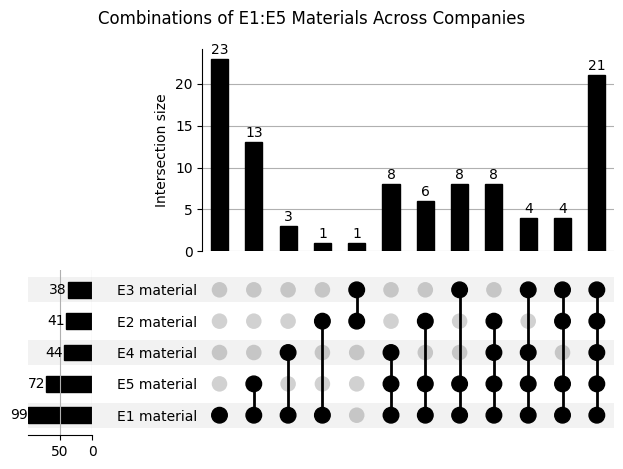

In [ ]:
from upsetplot import UpSet, from_indicators
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Select only the E1:E5 material columns

material_cols = ['E1 material', 'E2 material', 'E3 material', 'E4 material', 'E5 material']


# Convert to boolean: True if 'Yes', False otherwise
material_subset = yes[material_cols].apply(lambda x: x == 'Yes')

# Create the UpSet data
upset_data = from_indicators(material_cols, material_subset)

# Create and plot the UpSet plot
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()

plt.suptitle("Combinations of E1:E5 Materials Across Companies")
plt.subplots_adjust(top=0.9) # Alternative to tight_layout / it seems to work better for me
plt.show()




### Intersections across all E metrics when E4 is material

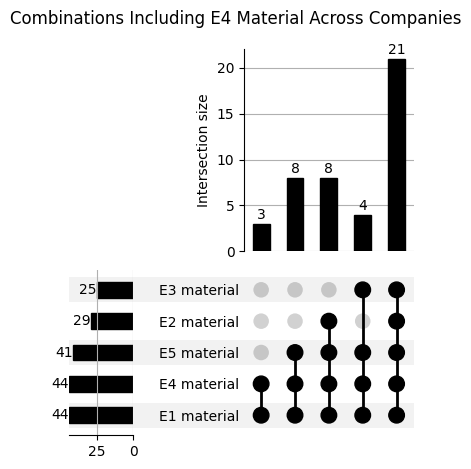

In [ ]:
from upsetplot import UpSet, from_indicators
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Select only the E1:E5 material columns
material_cols = ['E1 material', 'E2 material', 'E3 material', 'E4 material', 'E5 material']

# Convert to boolean: True if 'Yes', False otherwise
material_subset = yes[material_cols].apply(lambda x: x == 'Yes')

# Create the UpSet data
upset_data = from_indicators(material_cols, material_subset)

# Filter to include only subsets that include 'E4 material'
filtered_data = upset_data[upset_data.index.to_frame()['E4 material']]

# Create and plot the UpSet plot
upset = UpSet(filtered_data, subset_size='count', show_counts=True)
upset.plot()

plt.suptitle("Combinations Including E4 Material Across Companies")
plt.subplots_adjust(top=0.9)
plt.show()
